In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score as r2
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split as tts

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

%matplotlib inline

Загружаем данные

In [2]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# функция дял определения качества модели
def model_score(model):
    y_tpred = model.predict(train[fts])
    y_vpred = model.predict(valid[fts])
    print('Train score is ', r2(y_train, y_tpred))
    print('Valid score is ', r2(y_valid,y_vpred))

Изучаем данные

In [4]:
data.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Healthcare_1',
       'Helthcare_2', 'Shops_1', 'Shops_2', 'Price'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


In [6]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,Price
count,10000.00000,10000.000000,10000.000000,10000.000000,7887.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,5202.000000,10000.000000,10000.000000,10000.000000
mean,8383.40770,50.400800,1.890500,56.315775,37.199645,6.273300,8.526700,12.609400,3.990166e+03,0.118858,24.687000,5352.157400,8.039200,1142.904460,1.319500,4.231300,214138.857399
std,4859.01902,43.587592,0.839512,21.058732,86.241209,28.560917,5.241148,6.775974,2.005003e+05,0.119025,17.532614,4006.799803,23.831875,1021.517264,1.493601,4.806341,92872.293865
min,0.00000,0.000000,0.000000,1.136859,0.370619,0.000000,1.000000,0.000000,1.910000e+03,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,0.000000,59174.778028
25%,4169.50000,20.000000,1.000000,41.774881,22.769832,1.000000,4.000000,9.000000,1.974000e+03,0.017647,6.000000,1564.000000,0.000000,350.000000,0.000000,1.000000,153872.633942
50%,8394.50000,36.000000,2.000000,52.513310,32.781260,6.000000,7.000000,13.000000,1.977000e+03,0.075424,25.000000,5285.000000,2.000000,900.000000,1.000000,3.000000,192269.644879
75%,12592.50000,75.000000,2.000000,65.900625,45.128803,9.000000,12.000000,17.000000,2.001000e+03,0.195781,36.000000,7227.000000,5.000000,1548.000000,2.000000,6.000000,249135.462171
max,16798.00000,209.000000,19.000000,641.065193,7480.592129,2014.000000,42.000000,117.000000,2.005201e+07,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.000000,23.000000,633233.466570


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 20 columns):
Id               10000 non-null int64
DistrictId       10000 non-null int64
Rooms            10000 non-null float64
Square           10000 non-null float64
LifeSquare       7887 non-null float64
KitchenSquare    10000 non-null float64
Floor            10000 non-null int64
HouseFloor       10000 non-null float64
HouseYear        10000 non-null int64
Ecology_1        10000 non-null float64
Ecology_2        10000 non-null object
Ecology_3        10000 non-null object
Social_1         10000 non-null int64
Social_2         10000 non-null int64
Social_3         10000 non-null int64
Healthcare_1     5202 non-null float64
Helthcare_2      10000 non-null int64
Shops_1          10000 non-null int64
Shops_2          10000 non-null object
Price            10000 non-null float64
dtypes: float64(8), int64(9), object(3)
memory usage: 1.5+ MB


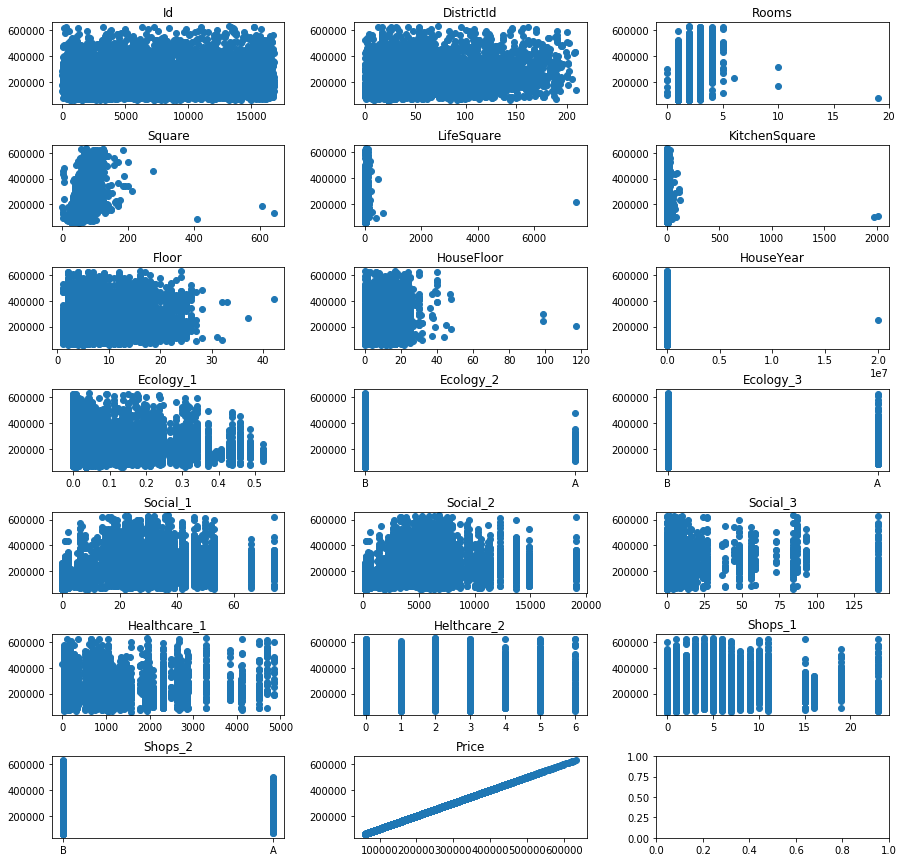

In [8]:
cols = data.columns
if len(cols)%3 == 0:
    c = 0
else:
    c =1
r = len(cols)//3 + c

fig, ax = plt.subplots(nrows=r, ncols=3)
ax = ax.flatten()
for i, j in enumerate(cols):
    ax[i].scatter(data[j], data['Price'])
    ax[i].set_title(j)
fig.set_size_inches(15, 15)
plt.subplots_adjust(wspace=0.3, hspace=0.5)

Убираем выбросы из Rooms и HouseYear. Остальные данные пока что оставим

In [9]:
data = data.loc[(data['Rooms'].between(1,6)) & (data['HouseYear'] < 3000)]
data = data.drop('Healthcare_1', axis=1)

Добавим новый признак - старый дом.

In [10]:
x_year = 1915
data['OldHouse'] = (data['HouseYear'] <= x_year).astype(int)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9987 entries, 0 to 9999
Data columns (total 20 columns):
Id               9987 non-null int64
DistrictId       9987 non-null int64
Rooms            9987 non-null float64
Square           9987 non-null float64
LifeSquare       7877 non-null float64
KitchenSquare    9987 non-null float64
Floor            9987 non-null int64
HouseFloor       9987 non-null float64
HouseYear        9987 non-null int64
Ecology_1        9987 non-null float64
Ecology_2        9987 non-null object
Ecology_3        9987 non-null object
Social_1         9987 non-null int64
Social_2         9987 non-null int64
Social_3         9987 non-null int64
Helthcare_2      9987 non-null int64
Shops_1          9987 non-null int64
Shops_2          9987 non-null object
Price            9987 non-null float64
OldHouse         9987 non-null int32
dtypes: float64(7), int32(1), int64(9), object(3)
memory usage: 1.6+ MB


Почистить Square и LifeSquare

In [12]:
max_square = data.groupby(['DistrictId','Rooms', 'Ecology_1']).agg({'Square': ['median'], 'LifeSquare':['median']})
max_square.columns = max_square.columns.swaplevel().droplevel()
max_square = max_square.reset_index().rename(columns={'LifeSquare': 'Max_lifesquare', 'Square': 'Max_square'})
max_square.head()

,DistrictId,Rooms,Ecology_1,Max_square,Max_lifesquare
0,0,1.0,0.006076,46.565366,21.118280
1,0,1.0,0.319809,33.237857,21.761830
2,0,2.0,0.006076,68.546343,40.162134
3,0,2.0,0.319809,48.662368,31.477777
4,0,3.0,0.006076,89.636583,49.965887


In [13]:
max_square.shape

(1154, 5)

In [14]:
max_square.loc[max_square['Max_lifesquare'].isnull()].shape

(12, 5)

In [15]:
max_square['Max_lifesquare'] = max_square['Max_lifesquare'].fillna(max_square['Max_square'])
max_square.loc[max_square['Max_lifesquare'].isnull()].shape

(0, 5)

In [16]:
max_square.loc[(max_square['Max_lifesquare'] > max_square['Max_square'])].shape

(12, 5)

In [17]:
max_square.loc[(max_square['Max_lifesquare'] > max_square['Max_square']), 'Max_square'] = max_square.loc[(max_square['Max_lifesquare'] > max_square['Max_square']), 'Max_lifesquare']
max_square.loc[(max_square['Max_lifesquare'] > max_square['Max_square']), :].shape

(0, 5)

In [18]:
max_square.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1154 entries, 0 to 1153
Data columns (total 5 columns):
DistrictId        1154 non-null int64
Rooms             1154 non-null float64
Ecology_1         1154 non-null float64
Max_square        1154 non-null float64
Max_lifesquare    1154 non-null float64
dtypes: float64(4), int64(1)
memory usage: 45.2 KB


In [19]:
data = pd.merge(data, max_square, on=['DistrictId', 'Rooms', 'Ecology_1'], how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9987 entries, 0 to 9986
Data columns (total 22 columns):
Id                9987 non-null int64
DistrictId        9987 non-null int64
Rooms             9987 non-null float64
Square            9987 non-null float64
LifeSquare        7877 non-null float64
KitchenSquare     9987 non-null float64
Floor             9987 non-null int64
HouseFloor        9987 non-null float64
HouseYear         9987 non-null int64
Ecology_1         9987 non-null float64
Ecology_2         9987 non-null object
Ecology_3         9987 non-null object
Social_1          9987 non-null int64
Social_2          9987 non-null int64
Social_3          9987 non-null int64
Helthcare_2       9987 non-null int64
Shops_1           9987 non-null int64
Shops_2           9987 non-null object
Price             9987 non-null float64
OldHouse          9987 non-null int32
Max_square        9987 non-null float64
Max_lifesquare    9987 non-null float64
dtypes: float64(9), int32(1), int64(

In [20]:
data['LifeSquare'] = data['LifeSquare'].fillna(data['Max_lifesquare'])

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9987 entries, 0 to 9986
Data columns (total 22 columns):
Id                9987 non-null int64
DistrictId        9987 non-null int64
Rooms             9987 non-null float64
Square            9987 non-null float64
LifeSquare        9987 non-null float64
KitchenSquare     9987 non-null float64
Floor             9987 non-null int64
HouseFloor        9987 non-null float64
HouseYear         9987 non-null int64
Ecology_1         9987 non-null float64
Ecology_2         9987 non-null object
Ecology_3         9987 non-null object
Social_1          9987 non-null int64
Social_2          9987 non-null int64
Social_3          9987 non-null int64
Helthcare_2       9987 non-null int64
Shops_1           9987 non-null int64
Shops_2           9987 non-null object
Price             9987 non-null float64
OldHouse          9987 non-null int32
Max_square        9987 non-null float64
Max_lifesquare    9987 non-null float64
dtypes: float64(9), int32(1), int64(

In [22]:
data.loc[data['Square'] < data['LifeSquare'], :].shape

(803, 22)

In [23]:
data.loc[(data['Square'] < data['LifeSquare']), 'Square'] = data.loc[(data['Square'] < data['LifeSquare']), 'Max_square']

In [24]:
data.loc[(data['Square'] < data['LifeSquare']), :].shape

(266, 22)

In [25]:
data.loc[(data['Square'] < data['LifeSquare']), 'Square'] = data.loc[(data['Square'] < data['LifeSquare']), 'LifeSquare']

In [26]:
data.loc[(data['Square'] < data['LifeSquare']), :].shape

(0, 22)

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9987 entries, 0 to 9986
Data columns (total 22 columns):
Id                9987 non-null int64
DistrictId        9987 non-null int64
Rooms             9987 non-null float64
Square            9987 non-null float64
LifeSquare        9987 non-null float64
KitchenSquare     9987 non-null float64
Floor             9987 non-null int64
HouseFloor        9987 non-null float64
HouseYear         9987 non-null int64
Ecology_1         9987 non-null float64
Ecology_2         9987 non-null object
Ecology_3         9987 non-null object
Social_1          9987 non-null int64
Social_2          9987 non-null int64
Social_3          9987 non-null int64
Helthcare_2       9987 non-null int64
Shops_1           9987 non-null int64
Shops_2           9987 non-null object
Price             9987 non-null float64
OldHouse          9987 non-null int32
Max_square        9987 non-null float64
Max_lifesquare    9987 non-null float64
dtypes: float64(9), int32(1), int64(

Почистим HouseFloor

In [28]:
max_floor = data.groupby(['DistrictId','HouseYear','Ecology_1'])[['HouseFloor', 'Floor']].max().reset_index().rename(columns={'HouseFloor': 'Max_housefloor', 'Floor': 'Max_floor'})
max_floor.head()

,DistrictId,HouseYear,Ecology_1,Max_housefloor,Max_floor
0,0,1959,0.319809,5.0,4
1,0,1960,0.319809,8.0,4
2,0,1961,0.319809,5.0,7
3,0,1962,0.319809,8.0,6
4,0,1963,0.319809,5.0,6


In [29]:
max_floor.loc[max_floor['Max_housefloor'] < max_floor['Max_floor']].shape

(589, 5)

In [30]:
max_floor.loc[max_floor['Max_housefloor'] < max_floor['Max_floor'], 'Max_housefloor'] = max_floor.loc[max_floor['Max_housefloor'] < max_floor['Max_floor'], 'Max_floor']

In [31]:
max_floor.loc[max_floor['Max_housefloor'] < max_floor['Max_floor']].shape

(0, 5)

In [32]:
max_floor = max_floor.drop(['Max_floor'], axis=1)

In [33]:
data = pd.merge(data, max_floor, on=['DistrictId', 'HouseYear', 'Ecology_1'], how='left')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9987 entries, 0 to 9986
Data columns (total 23 columns):
Id                9987 non-null int64
DistrictId        9987 non-null int64
Rooms             9987 non-null float64
Square            9987 non-null float64
LifeSquare        9987 non-null float64
KitchenSquare     9987 non-null float64
Floor             9987 non-null int64
HouseFloor        9987 non-null float64
HouseYear         9987 non-null int64
Ecology_1         9987 non-null float64
Ecology_2         9987 non-null object
Ecology_3         9987 non-null object
Social_1          9987 non-null int64
Social_2          9987 non-null int64
Social_3          9987 non-null int64
Helthcare_2       9987 non-null int64
Shops_1           9987 non-null int64
Shops_2           9987 non-null object
Price             9987 non-null float64
OldHouse          9987 non-null int32
Max_square        9987 non-null float64
Max_lifesquare    9987 non-null float64
Max_housefloor    9987 non-null floa

In [34]:
data.loc[(data['HouseFloor'] < data['Floor']), :].shape

(1819, 23)

In [35]:
data.loc[(data['HouseFloor'] < data['Floor']), 'HouseFloor'] = data.loc[(data['HouseFloor'] < data['Floor']), 'Max_housefloor']

In [36]:
data.loc[(data['HouseFloor'] < data['Floor']), :].shape

(0, 23)

In [37]:
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,OldHouse,Max_square,Max_lifesquare,Max_housefloor
count,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000,9987.000000
mean,8384.644938,50.408331,1.888755,57.574021,39.509367,6.276459,8.526885,15.291980,1984.854811,0.118819,24.691799,5352.982878,8.046360,1.319315,4.232202,214150.396971,0.000401,55.601704,38.661337,18.964454
std,4859.505979,43.588866,0.812567,77.327181,77.186483,28.578940,5.239464,9.582516,18.411032,0.119057,17.529139,4005.597649,23.845952,1.493048,4.806662,92896.001789,0.020010,17.121741,16.316814,14.455171
min,0.000000,0.000000,1.000000,4.633498,0.370619,0.000000,1.000000,1.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028,0.000000,20.036232,4.736100,2.000000
25%,4170.500000,20.000000,1.000000,42.163974,23.925158,1.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153860.591184,0.000000,42.163974,28.062699,12.000000
50%,8395.000000,36.000000,2.000000,52.915094,34.986673,6.000000,7.000000,16.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192248.072522,0.000000,50.885245,34.373448,17.000000
75%,12594.500000,75.000000,2.000000,66.253630,47.097708,9.000000,12.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,2.000000,6.000000,249118.488567,0.000000,64.652814,46.576718,25.000000
max,16798.000000,209.000000,6.000000,7480.592129,7480.592129,2014.000000,42.000000,117.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570,1.000000,226.291341,225.347649,117.000000


In [38]:
data = data.loc[(data['KitchenSquare'] < 500) & (data['Square'] < 500)]
data.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Helthcare_2,Shops_1,Price,OldHouse,Max_square,Max_lifesquare,Max_housefloor
count,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000,9982.000000
mean,8383.082949,50.412643,1.888800,56.720698,38.706068,5.879283,8.525546,15.291525,1984.846924,0.118853,24.696053,5353.817972,8.036065,1.318874,4.231016,214182.281416,0.000401,55.599483,38.661125,18.965538
std,4858.395017,43.595475,0.812595,19.924175,19.406746,5.175175,5.238572,9.584179,18.407183,0.119069,17.530484,4006.008636,23.814286,1.492459,4.803787,92902.977839,0.020015,17.123195,16.318148,14.458201
min,0.000000,0.000000,1.000000,4.633498,0.370619,0.000000,1.000000,1.000000,1910.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.000000,59174.778028,0.000000,20.036232,4.736100,2.000000
25%,4170.250000,20.000000,1.000000,42.163974,23.924247,1.000000,4.000000,9.000000,1974.000000,0.017647,6.000000,1564.000000,0.000000,0.000000,1.000000,153898.495433,0.000000,42.163974,28.062699,12.000000
50%,8393.500000,36.000000,2.000000,52.915063,34.986310,6.000000,7.000000,16.000000,1977.000000,0.075424,25.000000,5285.000000,2.000000,1.000000,3.000000,192269.644879,0.000000,50.885245,34.373448,17.000000
75%,12591.750000,75.000000,2.000000,66.243288,47.095670,9.000000,12.000000,17.000000,2001.000000,0.195781,36.000000,7227.000000,5.000000,2.000000,6.000000,249161.507295,0.000000,64.654475,46.576718,25.000000
max,16798.000000,209.000000,6.000000,461.463614,461.463614,123.000000,42.000000,117.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,6.000000,23.000000,633233.466570,1.000000,226.291341,225.347649,117.000000


Делим данные на тренировочные и валидационные

In [39]:
train, valid = tts(data, test_size=0.2, random_state=42)

In [40]:
mean_price = train.groupby(by=['DistrictId', 'Rooms', 'Ecology_1'])[['Price']].median().reset_index().rename(columns={'Price':'Mean_price'})

In [41]:
train = pd.merge(train, mean_price, on=['DistrictId', 'Rooms', 'Ecology_1'], how='left')
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7985 entries, 0 to 7984
Data columns (total 24 columns):
Id                7985 non-null int64
DistrictId        7985 non-null int64
Rooms             7985 non-null float64
Square            7985 non-null float64
LifeSquare        7985 non-null float64
KitchenSquare     7985 non-null float64
Floor             7985 non-null int64
HouseFloor        7985 non-null float64
HouseYear         7985 non-null int64
Ecology_1         7985 non-null float64
Ecology_2         7985 non-null object
Ecology_3         7985 non-null object
Social_1          7985 non-null int64
Social_2          7985 non-null int64
Social_3          7985 non-null int64
Helthcare_2       7985 non-null int64
Shops_1           7985 non-null int64
Shops_2           7985 non-null object
Price             7985 non-null float64
OldHouse          7985 non-null int32
Max_square        7985 non-null float64
Max_lifesquare    7985 non-null float64
Max_housefloor    7985 non-null floa

In [42]:
valid = pd.merge(valid, mean_price, on=['DistrictId', 'Rooms', 'Ecology_1'], how='left')
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 1996
Data columns (total 24 columns):
Id                1997 non-null int64
DistrictId        1997 non-null int64
Rooms             1997 non-null float64
Square            1997 non-null float64
LifeSquare        1997 non-null float64
KitchenSquare     1997 non-null float64
Floor             1997 non-null int64
HouseFloor        1997 non-null float64
HouseYear         1997 non-null int64
Ecology_1         1997 non-null float64
Ecology_2         1997 non-null object
Ecology_3         1997 non-null object
Social_1          1997 non-null int64
Social_2          1997 non-null int64
Social_3          1997 non-null int64
Helthcare_2       1997 non-null int64
Shops_1           1997 non-null int64
Shops_2           1997 non-null object
Price             1997 non-null float64
OldHouse          1997 non-null int32
Max_square        1997 non-null float64
Max_lifesquare    1997 non-null float64
Max_housefloor    1997 non-null floa

In [43]:
valid['Mean_price'].isnull().sum()

88

In [44]:
mean_price_2 = train.groupby(by=['Rooms'])[['Price']].mean().reset_index().rename(columns={'Price':'Mean_price2'})

In [45]:
train = pd.merge(train, mean_price_2, on=['Rooms'], how='left')
valid = pd.merge(valid, mean_price_2, on=['Rooms'], how='left')

In [46]:
valid['Mean_price2'].isnull().sum()

0

In [47]:
valid['Mean_price'] = valid['Mean_price'].fillna(valid['Mean_price2'])

In [49]:
valid['Mean_price'].isnull().sum()

0

In [50]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 1996
Data columns (total 25 columns):
Id                1997 non-null int64
DistrictId        1997 non-null int64
Rooms             1997 non-null float64
Square            1997 non-null float64
LifeSquare        1997 non-null float64
KitchenSquare     1997 non-null float64
Floor             1997 non-null int64
HouseFloor        1997 non-null float64
HouseYear         1997 non-null int64
Ecology_1         1997 non-null float64
Ecology_2         1997 non-null object
Ecology_3         1997 non-null object
Social_1          1997 non-null int64
Social_2          1997 non-null int64
Social_3          1997 non-null int64
Helthcare_2       1997 non-null int64
Shops_1           1997 non-null int64
Shops_2           1997 non-null object
Price             1997 non-null float64
OldHouse          1997 non-null int32
Max_square        1997 non-null float64
Max_lifesquare    1997 non-null float64
Max_housefloor    1997 non-null floa

In [51]:
y_train, y_valid = train['Price'], valid['Price']

In [52]:
train.columns

Index(['Id', 'DistrictId', 'Rooms', 'Square', 'LifeSquare', 'KitchenSquare',
       'Floor', 'HouseFloor', 'HouseYear', 'Ecology_1', 'Ecology_2',
       'Ecology_3', 'Social_1', 'Social_2', 'Social_3', 'Helthcare_2',
       'Shops_1', 'Shops_2', 'Price', 'OldHouse', 'Max_square',
       'Max_lifesquare', 'Max_housefloor', 'Mean_price', 'Mean_price2'],
      dtype='object')

In [53]:
fts = ['Rooms', 'Square', 'LifeSquare', 'Ecology_1', 'HouseYear', 'Social_1', 'Social_2', 'Floor',
       'Social_3', 'Shops_1', 'Mean_price2', 'HouseFloor', 'KitchenSquare', 'OldHouse']

In [54]:
train[fts].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7985 entries, 0 to 7984
Data columns (total 14 columns):
Rooms            7985 non-null float64
Square           7985 non-null float64
LifeSquare       7985 non-null float64
Ecology_1        7985 non-null float64
HouseYear        7985 non-null int64
Social_1         7985 non-null int64
Social_2         7985 non-null int64
Floor            7985 non-null int64
Social_3         7985 non-null int64
Shops_1          7985 non-null int64
Mean_price2      7985 non-null float64
HouseFloor       7985 non-null float64
KitchenSquare    7985 non-null float64
OldHouse         7985 non-null int32
dtypes: float64(7), int32(1), int64(6)
memory usage: 904.6 KB


Линейная регрессия

In [55]:
lr = LinearRegression()
lr.fit(train[fts], y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [56]:
model_score(lr)

Train score is  0.4760336085007145
Valid score is  0.49897140356223146


Случайный лес деревьев

In [57]:
rf = RandomForestRegressor(n_estimators=240, random_state=42, min_samples_leaf=3, max_depth=14, max_features=11, min_samples_split=9)
rf.fit(train[fts], y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=14,
           max_features=11, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=3,
           min_samples_split=9, min_weight_fraction_leaf=0.0,
           n_estimators=240, n_jobs=None, oob_score=False, random_state=42,
           verbose=0, warm_start=False)

In [58]:
model_score(rf)

Train score is  0.8708588219098852
Valid score is  0.7416048266333186


Градиентный бустинг

In [59]:
gbr = GradientBoostingRegressor(n_estimators=840, max_depth=3, learning_rate=0.1, min_samples_split=3, 
                                max_features=5, random_state=42, min_samples_leaf=3)
gbr.fit(train[fts], y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=5,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=3,
             min_samples_split=3, min_weight_fraction_leaf=0.0,
             n_estimators=840, n_iter_no_change=None, presort='auto',
             random_state=42, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [60]:
model_score(gbr)

Train score is  0.8573854258527649
Valid score is  0.7517313139864079


Чистим данные для test

In [61]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1
count,5000.000000,5000.000000,5000.000000,5000.000000,3959.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000
mean,8412.595400,51.279200,1.910000,56.449500,36.158810,5.976800,8.632000,12.601000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800
std,4832.674037,44.179466,0.838594,19.092787,17.825287,9.950018,5.483228,6.789213,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,0.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000
25%,4221.750000,21.000000,1.000000,41.906231,23.092026,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000
50%,8320.500000,37.000000,2.000000,52.921340,32.925087,6.000000,7.000000,12.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000
75%,12598.250000,77.000000,2.000000,66.285129,45.174091,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000
max,16795.000000,212.000000,17.000000,223.453689,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000


In [62]:
x_year = 1915
test['OldHouse'] = (test['HouseYear'] <= x_year).astype(int)

In [63]:
max_square = test.groupby(['DistrictId','Rooms', 'Ecology_1']).agg({'Square': ['median'], 'LifeSquare':['median']})
max_square.columns = max_square.columns.swaplevel().droplevel()
max_square = max_square.reset_index().rename(columns={'LifeSquare': 'Max_lifesquare', 'Square': 'Max_square'})
max_square.head()

,DistrictId,Rooms,Ecology_1,Max_square,Max_lifesquare
0,0,1.0,0.006076,42.704131,20.614875
1,0,1.0,0.319809,34.789450,19.943391
2,0,2.0,0.006076,45.797451,32.445527
3,0,2.0,0.319809,44.656467,28.435208
4,0,3.0,0.006076,108.851325,53.427051


In [64]:
max_square.shape

(982, 5)

In [65]:
max_square.loc[max_square['Max_lifesquare'].isnull()].shape

(13, 5)

In [66]:
max_square['Max_lifesquare'] = max_square['Max_lifesquare'].fillna(max_square['Max_square'])
max_square.loc[max_square['Max_lifesquare'].isnull()].shape

(0, 5)

In [67]:
max_square.loc[(max_square['Max_lifesquare'] > max_square['Max_square'])].shape

(14, 5)

In [68]:
max_square.loc[(max_square['Max_lifesquare'] > max_square['Max_square']), 'Max_square'] = max_square.loc[(max_square['Max_lifesquare'] > max_square['Max_square']), 'Max_lifesquare']
max_square.loc[(max_square['Max_lifesquare'] > max_square['Max_square']), :].shape

(0, 5)

In [69]:
max_square.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 5 columns):
DistrictId        982 non-null int64
Rooms             982 non-null float64
Ecology_1         982 non-null float64
Max_square        982 non-null float64
Max_lifesquare    982 non-null float64
dtypes: float64(4), int64(1)
memory usage: 38.4 KB


In [70]:
test = pd.merge(test, max_square, on=['DistrictId', 'Rooms', 'Ecology_1'], how='left')
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 22 columns):
Id                5000 non-null int64
DistrictId        5000 non-null int64
Rooms             5000 non-null float64
Square            5000 non-null float64
LifeSquare        3959 non-null float64
KitchenSquare     5000 non-null float64
Floor             5000 non-null int64
HouseFloor        5000 non-null float64
HouseYear         5000 non-null int64
Ecology_1         5000 non-null float64
Ecology_2         5000 non-null object
Ecology_3         5000 non-null object
Social_1          5000 non-null int64
Social_2          5000 non-null int64
Social_3          5000 non-null int64
Healthcare_1      2623 non-null float64
Helthcare_2       5000 non-null int64
Shops_1           5000 non-null int64
Shops_2           5000 non-null object
OldHouse          5000 non-null int32
Max_square        5000 non-null float64
Max_lifesquare    5000 non-null float64
dtypes: float64(9), int32(1), int64(

In [71]:
test['LifeSquare'] = test['LifeSquare'].fillna(test['Max_lifesquare'])

In [72]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 22 columns):
Id                5000 non-null int64
DistrictId        5000 non-null int64
Rooms             5000 non-null float64
Square            5000 non-null float64
LifeSquare        5000 non-null float64
KitchenSquare     5000 non-null float64
Floor             5000 non-null int64
HouseFloor        5000 non-null float64
HouseYear         5000 non-null int64
Ecology_1         5000 non-null float64
Ecology_2         5000 non-null object
Ecology_3         5000 non-null object
Social_1          5000 non-null int64
Social_2          5000 non-null int64
Social_3          5000 non-null int64
Healthcare_1      2623 non-null float64
Helthcare_2       5000 non-null int64
Shops_1           5000 non-null int64
Shops_2           5000 non-null object
OldHouse          5000 non-null int32
Max_square        5000 non-null float64
Max_lifesquare    5000 non-null float64
dtypes: float64(9), int32(1), int64(

In [73]:
test.loc[test['Square'] < test['LifeSquare'], :].shape

(420, 22)

In [74]:
test.loc[(test['Square'] < test['LifeSquare']), 'Square'] = test.loc[(test['Square'] < test['LifeSquare']), 'Max_square']
test.loc[test['Square'] < test['LifeSquare'], :].shape

(151, 22)

In [75]:
test.loc[(test['Square'] < test['LifeSquare']), 'Square'] = test.loc[(test['Square'] < test['LifeSquare']), 'LifeSquare']
test.loc[test['Square'] < test['LifeSquare'], :].shape

(0, 22)

In [76]:
max_floor = test.groupby(['DistrictId','HouseYear','Ecology_1'])[['HouseFloor', 'Floor']].max().reset_index().rename(columns={'HouseFloor': 'Max_housefloor', 'Floor': 'Max_floor'})
max_floor.head()

,DistrictId,HouseYear,Ecology_1,Max_housefloor,Max_floor
0,0,1938,0.319809,5.0,5
1,0,1961,0.319809,5.0,6
2,0,1962,0.319809,5.0,7
3,0,1963,0.319809,8.0,4
4,0,1965,0.319809,12.0,12


In [77]:
max_floor.loc[max_floor['Max_housefloor'] < max_floor['Max_floor']].shape

(344, 5)

In [78]:
max_floor.loc[max_floor['Max_housefloor'] < max_floor['Max_floor'], 'Max_housefloor'] = max_floor.loc[max_floor['Max_housefloor'] < max_floor['Max_floor'], 'Max_floor']
max_floor.loc[max_floor['Max_housefloor'] < max_floor['Max_floor']].shape

(0, 5)

In [79]:
max_floor = max_floor.drop(['Max_floor'], axis=1)

In [80]:
test = pd.merge(test, max_floor, on=['DistrictId', 'HouseYear', 'Ecology_1'], how='left')
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 23 columns):
Id                5000 non-null int64
DistrictId        5000 non-null int64
Rooms             5000 non-null float64
Square            5000 non-null float64
LifeSquare        5000 non-null float64
KitchenSquare     5000 non-null float64
Floor             5000 non-null int64
HouseFloor        5000 non-null float64
HouseYear         5000 non-null int64
Ecology_1         5000 non-null float64
Ecology_2         5000 non-null object
Ecology_3         5000 non-null object
Social_1          5000 non-null int64
Social_2          5000 non-null int64
Social_3          5000 non-null int64
Healthcare_1      2623 non-null float64
Helthcare_2       5000 non-null int64
Shops_1           5000 non-null int64
Shops_2           5000 non-null object
OldHouse          5000 non-null int32
Max_square        5000 non-null float64
Max_lifesquare    5000 non-null float64
Max_housefloor    5000 non-null floa

In [81]:
test.loc[(test['HouseFloor'] < test['Floor']), :].shape

(884, 23)

In [82]:
test.loc[(test['HouseFloor'] < test['Floor']), 'HouseFloor'] = test.loc[(test['HouseFloor'] < test['Floor']), 'Max_housefloor']
test.loc[(test['HouseFloor'] < test['Floor']), :].shape

(0, 23)

In [83]:
test.describe()

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,Social_1,Social_2,Social_3,Healthcare_1,Helthcare_2,Shops_1,OldHouse,Max_square,Max_lifesquare,Max_housefloor
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,2623.000000,5000.00000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,8412.595400,51.279200,1.910000,56.888383,38.320648,5.976800,8.632000,15.224000,1984.392600,0.119874,24.933800,5406.900000,8.262600,1146.657263,1.31940,4.242800,0.001200,56.023832,38.183790,17.842400
std,4832.674037,44.179466,0.838594,19.358040,18.048618,9.950018,5.483228,10.220211,18.573149,0.120070,17.532202,4026.614773,23.863762,1044.744231,1.47994,4.777365,0.034624,17.154592,15.298886,12.540918
min,1.000000,0.000000,0.000000,1.378543,0.333490,0.000000,1.000000,1.000000,1908.000000,0.000000,0.000000,168.000000,0.000000,0.000000,0.00000,0.000000,0.000000,15.948246,0.333490,2.000000
25%,4221.750000,21.000000,1.000000,42.204429,24.404266,1.000000,4.000000,9.000000,1973.000000,0.019509,6.000000,1564.000000,0.000000,325.000000,0.00000,1.000000,0.000000,42.134067,27.224020,12.000000
50%,8320.500000,37.000000,2.000000,53.327724,34.823829,6.000000,7.000000,15.000000,1977.000000,0.072158,25.000000,5285.000000,2.000000,900.000000,1.00000,3.000000,0.000000,52.320323,34.103139,17.000000
75%,12598.250000,77.000000,2.000000,66.473875,47.251656,9.000000,12.000000,17.000000,2000.000000,0.195781,36.000000,7287.000000,5.000000,1548.000000,2.00000,6.000000,0.000000,64.443362,46.410005,24.000000
max,16795.000000,212.000000,17.000000,303.071094,303.071094,620.000000,78.000000,99.000000,2020.000000,0.521867,74.000000,19083.000000,141.000000,4849.000000,6.00000,23.000000,1.000000,223.453689,169.901701,99.000000


In [84]:
test = pd.merge(test, mean_price, on=['DistrictId', 'Rooms', 'Ecology_1'], how='left')
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 24 columns):
Id                5000 non-null int64
DistrictId        5000 non-null int64
Rooms             5000 non-null float64
Square            5000 non-null float64
LifeSquare        5000 non-null float64
KitchenSquare     5000 non-null float64
Floor             5000 non-null int64
HouseFloor        5000 non-null float64
HouseYear         5000 non-null int64
Ecology_1         5000 non-null float64
Ecology_2         5000 non-null object
Ecology_3         5000 non-null object
Social_1          5000 non-null int64
Social_2          5000 non-null int64
Social_3          5000 non-null int64
Healthcare_1      2623 non-null float64
Helthcare_2       5000 non-null int64
Shops_1           5000 non-null int64
Shops_2           5000 non-null object
OldHouse          5000 non-null int32
Max_square        5000 non-null float64
Max_lifesquare    5000 non-null float64
Max_housefloor    5000 non-null floa

In [85]:
test = pd.merge(test, mean_price_2, on=['Rooms'], how='left')
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 25 columns):
Id                5000 non-null int64
DistrictId        5000 non-null int64
Rooms             5000 non-null float64
Square            5000 non-null float64
LifeSquare        5000 non-null float64
KitchenSquare     5000 non-null float64
Floor             5000 non-null int64
HouseFloor        5000 non-null float64
HouseYear         5000 non-null int64
Ecology_1         5000 non-null float64
Ecology_2         5000 non-null object
Ecology_3         5000 non-null object
Social_1          5000 non-null int64
Social_2          5000 non-null int64
Social_3          5000 non-null int64
Healthcare_1      2623 non-null float64
Helthcare_2       5000 non-null int64
Shops_1           5000 non-null int64
Shops_2           5000 non-null object
OldHouse          5000 non-null int32
Max_square        5000 non-null float64
Max_lifesquare    5000 non-null float64
Max_housefloor    5000 non-null floa

In [86]:
test.loc[test['Mean_price2'].isnull()]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,OldHouse,Max_square,Max_lifesquare,Max_housefloor,Mean_price,Mean_price2
2406,3343,58,0.0,116.824201,113.692424,0.0,3,3.0,1977,0.437885,...,1084.0,0,5,B,0,116.824201,113.692424,17.0,NaN,NaN
2524,10729,27,0.0,76.345154,42.820796,12.0,14,20.0,1977,0.017647,...,NaN,0,0,B,0,76.345154,42.820796,20.0,NaN,NaN
3398,1435,111,17.0,52.866107,32.528342,8.0,15,17.0,1987,0.093443,...,3300.0,2,4,B,0,52.866107,32.528342,17.0,NaN,NaN


In [87]:
test.loc[test['Rooms'] == 0, 'Mean_price2'] = test.loc[test['Rooms'] == 1, 'Mean_price2'].median()
test.loc[test['Rooms'] == 17, 'Mean_price2'] = test.loc[test['Rooms'] == 6, 'Mean_price2'].median()
test.loc[test['Mean_price2'].isnull()]

,Id,DistrictId,Rooms,Square,LifeSquare,KitchenSquare,Floor,HouseFloor,HouseYear,Ecology_1,...,Healthcare_1,Helthcare_2,Shops_1,Shops_2,OldHouse,Max_square,Max_lifesquare,Max_housefloor,Mean_price,Mean_price2


In [88]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 25 columns):
Id                5000 non-null int64
DistrictId        5000 non-null int64
Rooms             5000 non-null float64
Square            5000 non-null float64
LifeSquare        5000 non-null float64
KitchenSquare     5000 non-null float64
Floor             5000 non-null int64
HouseFloor        5000 non-null float64
HouseYear         5000 non-null int64
Ecology_1         5000 non-null float64
Ecology_2         5000 non-null object
Ecology_3         5000 non-null object
Social_1          5000 non-null int64
Social_2          5000 non-null int64
Social_3          5000 non-null int64
Healthcare_1      2623 non-null float64
Helthcare_2       5000 non-null int64
Shops_1           5000 non-null int64
Shops_2           5000 non-null object
OldHouse          5000 non-null int32
Max_square        5000 non-null float64
Max_lifesquare    5000 non-null float64
Max_housefloor    5000 non-null floa

In [89]:
test_pred = gbr.predict(test[fts])
test_pred

array([152567.21224107, 214406.50180041, 129781.17919899, ...,
       344764.19104878, 207762.01099818, 187091.68702733])

In [90]:
answer = pd.DataFrame({'Id': test['Id'], 'Price': test_pred})
answer.head()

,Id,Price
0,725,152567.212241
1,15856,214406.501800
2,5480,129781.179199
3,15664,363587.539635
4,14275,143102.461584


In [91]:
answer.to_csv('DFrantsuzov_predictions.csv', index=False)